**ABSTRACT**

Este conjunto de datos contiene información clínica y de laboratorio relacionada con el funcionamiento de la glándula tiroides, recopilada de pacientes con diversas condiciones médicas, incluyendo hipertiroidismo, hipotiroidismo y función tiroidea normal. Las variables incluidas abarcan desde niveles hormonales (TSH, T3, T4, T4U), edad, sexo, además de los posibles síntomas que pueden presentar los pacientes como sudoración o intolerancia al calor, estrés, dolores de cabeza o migrañas, deficiencia nutricional, enfermedades pituitarias, fatiga, variación de peso, menstruación, piel seca o caída de cabello y bocio.

Además, se indica el estado de la enfermedad tiroidea con el detalle "Actual" dónde:

0 = Sin enfermedad tiroidea (normal).

1 = Hipotiroidismo.

2 = Hipertiroidismo.

Para comprender los resultados del análisis se describen a continuación los indicadores hormonales presentes en el dataset:

**TSH** (Hormona Estimulante de la Tiroides):
Valor normal: 0.4–4.0 mIU/L.
Niveles elevados suelen indicar hipotiroidismo, mientras que niveles bajos pueden señalar hipertiroidismo.

**T3 total** (Triyodotironina):
Valor normal: 80–200 ng/dL.
Elevaciones están asociadas a hipertiroidismo, y valores bajos a hipotiroidismo o enfermedades no tiroideas.

**T4 total** (Tiroxina):
Valor normal: 5.0–12.0 μg/dL.
Es una de las principales hormonas tiroideas y su valor ayuda a identificar el tipo y gravedad del trastorno. Valores elevados están asociados al hipertiroidismo, miesntras que niveles bajos pueden indicar hipotiroidismo.

**T4U** o Thyroxine Uptake no mide directamente la hormona tiroidea, sino que estima la cantidad de proteínas transportadoras disponibles en sangre para unirse a T4 (tiroxina). Se usa para calcular el índice de tiroxina libre (FTI o TFI).
Valor normal: 0.70 – 1.30 (índice sin unidad)
Valores altos puede indicar menos TBG disponible (como en hipertiroidismo).
Valores bajos puede indicar más TBG disponible (como en hipotiroidismo o durante el embarazo).

**TFI** (también llamado FTI – Free Thyroxine Index) es un índice calculado a partir de los valores de T4 total y T4U.
Se usa para estimar los niveles de T4 libre, especialmente en situaciones donde las proteínas transportadoras (como la TBG) pueden estar alteradas.
Valores normales: 80-150 (índice sin unidad).
Valores altos son compatibles con hipertiroidismo y valores bajos son compatibles con hipotiroidismo.

Se espera que con los datos de las variables selecciodas y utilizando métodos de análisis correspondientes se pueda responder las preguntas e hipótesis que se orientan al diagnóstico y análisis de la enfermedad de tiroides.

Fuente del dataset:
https://drive.google.com/file/d/11nt0PT73dEQvoeL8365rtkBrEdXqen2b/view?usp=sharing

**DICCIONARIO DE VARIABLES**

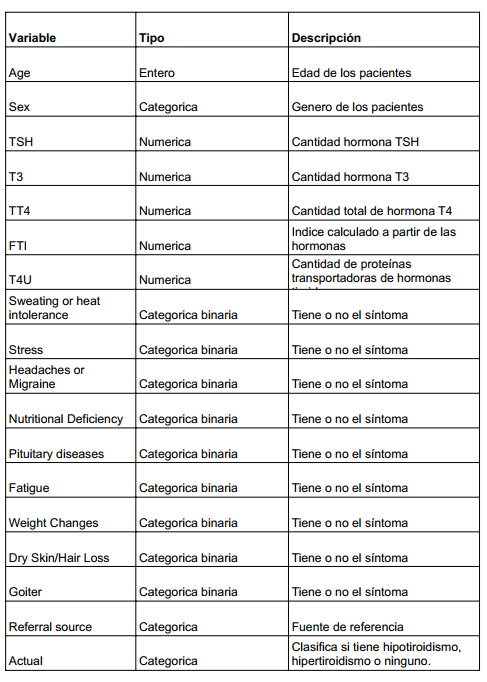

**PREGUNTAS E HIPÓTESIS DE INTERÉS**

1)Factores asociados a sintomas.

-¿Cuáles son los síntomas que destacan en pacientes con hipotiroidismo?

-¿Cuáles son los síntomas que destacan en pacientes con hipertiroidismo?

-¿Hay síntomas que predicen mejor la alteración hormonal?

2)Análisis hormonal.

¿Qué síntomas están más fuertemente correlacionados con TSH, T3 o T4?

3) Diagnostico o detección de disfunción tiroidea.

¿Qué combinación de síntomas y valores hormonales predicen mejor hipotiroidismo o hipertiroidismo?


**ANÁLISIS EXPLORATORIO DE DATOS**

In [103]:
##Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Carga de datos
df=pd.read_csv('/content/thyroid_data_conditioned.csv', dtype={'Sex': 'category'})
df.head(15)

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Menstruation,Dry Skin/Hair Loss,Goiter,Referral source,Actual
0,16,Male,2.593114,92.0,7.418163,0.863702,127.0,0,0,0,0,0,0,0,0,0,0,Family,0
1,13,Female,10.016625,93.0,3.116953,0.468052,43.0,1,0,1,0,1,1,1,0,0,1,Family,1
2,17,Male,9.103430,91.0,4.531221,0.468330,59.0,1,1,1,1,0,0,1,1,0,0,Self,1
3,14,Male,0.164024,243.0,15.764255,1.031108,148.0,0,0,1,1,0,0,0,1,1,1,Self,2
4,16,Female,8.683580,81.0,2.819036,0.569156,49.0,0,0,1,1,0,0,0,0,1,1,Self,1
5,19,Female,2.721057,139.0,7.017567,0.963533,128.0,0,0,0,0,0,0,0,1,0,0,Self,0
6,12,Female,1.206803,116.0,6.514149,1.153853,145.0,0,0,1,0,0,0,0,0,0,0,Doctor,0
7,16,Male,3.191950,105.0,7.468094,1.170864,95.0,0,1,0,0,1,0,0,0,0,0,Doctor,0
8,17,Female,10.318026,96.0,3.880930,0.424491,64.0,1,1,0,1,1,0,0,1,1,1,Family,1
9,14,Male,5.020242,98.0,4.635671,0.538584,44.0,1,1,1,0,1,1,0,1,1,1,Self,1


In [104]:
##Identificación de valores nulos
print('Valores nulos del conjunto de datos')
print(pd.isnull(df).sum())

Valores nulos del conjunto de datos
Age                             0
Sex                             0
TSH                             0
T3                              0
TT4                             0
T4U                             0
FTI                             0
Sweating or heat intolerance    0
Stress                          0
Headaches or Migraine           0
Nutritional Deficiency          0
Pituitary diseases              0
Fatigue                         0
Weight Changes                  0
Menstruation                    0
Dry Skin/Hair Loss              0
Goiter                          0
Referral source                 0
Actual                          0
dtype: int64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           2500 non-null   int64   
 1   Sex                           2500 non-null   category
 2   TSH                           2500 non-null   float64 
 3   T3                            2500 non-null   float64 
 4   TT4                           2500 non-null   float64 
 5   T4U                           2500 non-null   float64 
 6   FTI                           2500 non-null   float64 
 7   Sweating or heat intolerance  2500 non-null   int64   
 8   Stress                        2500 non-null   int64   
 9   Headaches or Migraine         2500 non-null   int64   
 10  Nutritional Deficiency        2500 non-null   int64   
 11  Pituitary diseases            2500 non-null   int64   
 12  Fatigue                       2500 non-null   in

In [106]:
#probando si sex al ser category se puede contar o hacer operaciones matematicas
conteo_male = df['Sex'].value_counts()
print(conteo_male['Male'])

1364


In [107]:
conteo_male = df['Sex'].value_counts()
print(conteo_male['Female'])

1136


In [108]:
df.nunique()

,0
Age,20
Sex,2
TSH,2500
T3,2131
TT4,2500
T4U,2500
FTI,2138
Sweating or heat intolerance,2
Stress,2
Headaches or Migraine,2


In [109]:
df.describe(include='category')

,Sex
count,2500
unique,2
top,Male
freq,1364


In [110]:
##eliminar la columna menstruacion por tener un error para el genero masculino

df_final = df.drop(columns=['Menstruation'])
df_final.head(15)

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
0,16,Male,2.593114,92.0,7.418163,0.863702,127.0,0,0,0,0,0,0,0,0,0,Family,0
1,13,Female,10.016625,93.0,3.116953,0.468052,43.0,1,0,1,0,1,1,1,0,1,Family,1
2,17,Male,9.103430,91.0,4.531221,0.468330,59.0,1,1,1,1,0,0,1,0,0,Self,1
3,14,Male,0.164024,243.0,15.764255,1.031108,148.0,0,0,1,1,0,0,0,1,1,Self,2
4,16,Female,8.683580,81.0,2.819036,0.569156,49.0,0,0,1,1,0,0,0,1,1,Self,1
5,19,Female,2.721057,139.0,7.017567,0.963533,128.0,0,0,0,0,0,0,0,0,0,Self,0
6,12,Female,1.206803,116.0,6.514149,1.153853,145.0,0,0,1,0,0,0,0,0,0,Doctor,0
7,16,Male,3.191950,105.0,7.468094,1.170864,95.0,0,1,0,0,1,0,0,0,0,Doctor,0
8,17,Female,10.318026,96.0,3.880930,0.424491,64.0,1,1,0,1,1,0,0,1,1,Family,1
9,14,Male,5.020242,98.0,4.635671,0.538584,44.0,1,1,1,0,1,1,0,1,1,Self,1


In [111]:
df_final.describe()

,Age,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Actual
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000
mean,13.999200,4.242237,155.205680,9.596226,1.024568,120.163584,0.458400,0.470400,0.446000,0.474000,0.442000,0.446800,0.458800,0.420400,0.436000,0.88480
std,3.378604,5.225572,84.797463,6.128739,0.452175,57.359981,0.498366,0.499223,0.497175,0.499423,0.496724,0.497261,0.498399,0.493722,0.495986,0.83463
min,3.000000,0.010181,40.054310,1.011076,0.300764,30.045614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,11.000000,0.321845,84.866266,4.519233,0.635019,71.106634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,14.000000,2.184844,131.135765,8.418598,1.019943,117.330122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,17.000000,6.177579,223.746028,13.320921,1.317950,156.829539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000
max,23.000000,19.985473,349.925953,24.961146,1.998527,249.873647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000


In [112]:
#Calculo coeficiente de correlacion
# Nombre de la columna que querés excluir
columna_a_excluir = ['Sex', 'Referral source']

# Crear un nuevo DataFrame sin esa columna
df_correlacion = df_final.drop(columns=columna_a_excluir)

# Calcular la matriz de correlación
matriz_correlacion = df_correlacion.corr()

matriz_correlacion

,Age,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Actual
Age,1.000000,0.035047,-0.040370,-0.027248,-0.045759,-0.038764,0.025409,0.013035,0.007121,-0.016613,0.021194,-0.045042,-0.022595,0.012436,0.018834,-0.000742
TSH,0.035047,1.000000,-0.687800,-0.681209,-0.736099,-0.725943,0.216272,0.231499,0.246592,0.208765,0.234830,0.254899,0.103795,0.225599,0.149422,-0.081682
T3,-0.040370,-0.687800,1.000000,0.853736,0.838245,0.846289,-0.005599,0.071485,-0.009249,0.032899,-0.043616,0.003208,0.110150,0.002454,0.037153,0.583039
TT4,-0.027248,-0.681209,0.853736,1.000000,0.850942,0.855015,-0.014236,0.048242,-0.011745,0.014820,-0.051291,-0.013006,0.102420,-0.028609,0.030880,0.555606
T4U,-0.045759,-0.736099,0.838245,0.850942,1.000000,0.866612,-0.063267,-0.013905,-0.074137,-0.036261,-0.105206,-0.083771,0.044331,-0.069741,-0.014608,0.451933
FTI,-0.038764,-0.725943,0.846289,0.855015,0.866612,1.000000,-0.056936,-0.007615,-0.076997,-0.014515,-0.085293,-0.076293,0.055572,-0.059623,-0.005621,0.476108
Sweating or heat intolerance,0.025409,0.216272,-0.005599,-0.014236,-0.063267,-0.056936,1.000000,0.331202,0.198459,0.216717,0.152706,0.213092,0.221060,0.208528,0.155970,0.337693
Stress,0.013035,0.231499,0.071485,0.048242,-0.013905,-0.007615,0.331202,1.000000,0.258771,0.288216,0.226254,0.305569,0.243576,0.197435,0.155573,0.483530
Headaches or Migraine,0.007121,0.246592,-0.009249,-0.011745,-0.074137,-0.076997,0.198459,0.258771,1.000000,0.258645,0.199579,0.195556,0.176732,0.204190,0.225337,0.364953
Nutritional Deficiency,-0.016613,0.208765,0.032899,0.014820,-0.036261,-0.014515,0.216717,0.288216,0.258645,1.000000,0.200390,0.207122,0.196649,0.196084,0.208943,0.371051


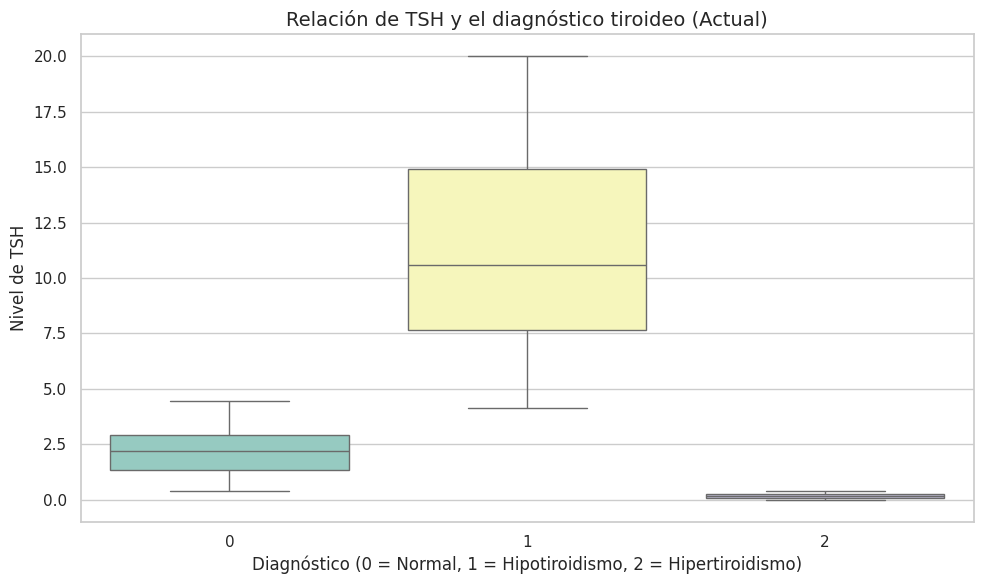

In [113]:
#Grafico de caja y bigotes para ver la relacion entre TSH y el diagnostico

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Crear gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Actual", y="TSH", data=df_final, palette="Set3")

# Etiquetas y título
plt.title("Relación de TSH y el diagnóstico tiroideo (Actual)", fontsize=14)
plt.xlabel("Diagnóstico (0 = Normal, 1 = Hipotiroidismo, 2 = Hipertiroidismo)")
plt.ylabel("Nivel de TSH")

# Mostrar gráfico
plt.tight_layout()
plt.show()

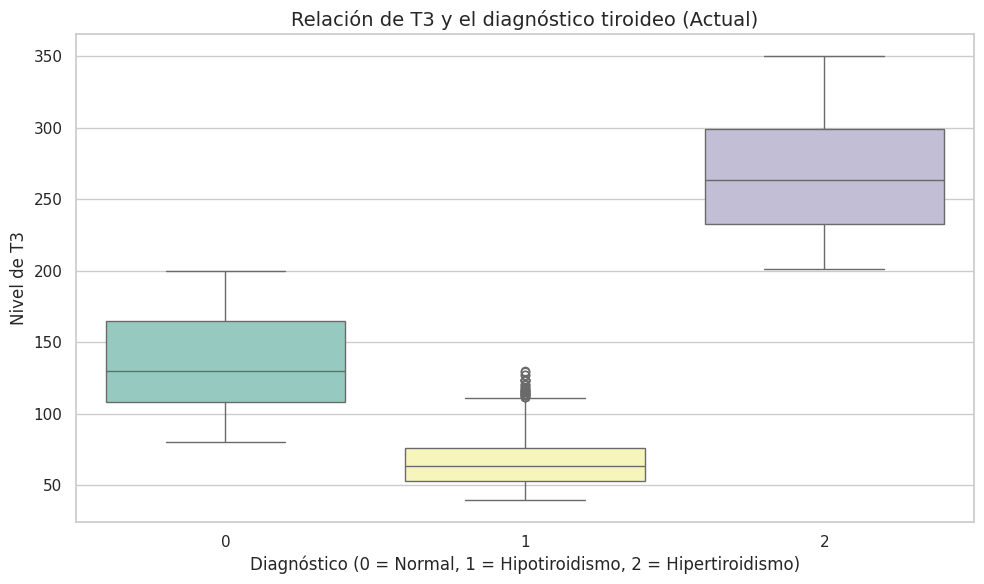

In [114]:
#Grafico de caja y bigotes para ver la relacion entre T3 y el diagnostico

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Crear gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Actual", y="T3", data=df_final, palette="Set3")

# Etiquetas y título
plt.title("Relación de T3 y el diagnóstico tiroideo (Actual)", fontsize=14)
plt.xlabel("Diagnóstico (0 = Normal, 1 = Hipotiroidismo, 2 = Hipertiroidismo)")
plt.ylabel("Nivel de T3")

# Mostrar gráfico
plt.tight_layout()
plt.show()

En este gráfico notamos la presencia de outliers en los valores de la hormona T3 en lo que respecta al diagnostico de hipotiroidismo.

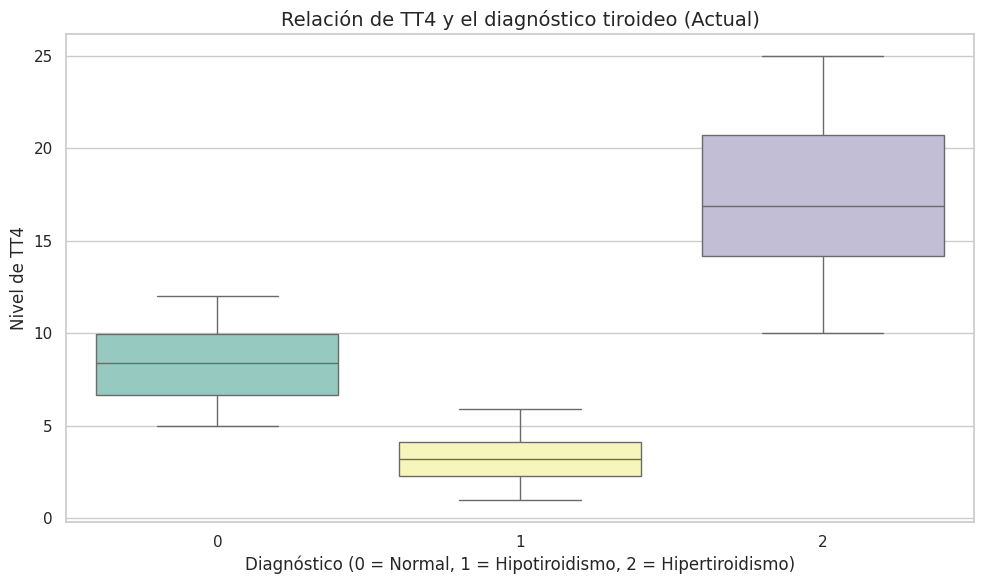

In [115]:
 #Grafico de caja y bigotes para ver la relacion entre TT4 y el diagnostico

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Crear gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Actual", y="TT4", data=df_final, palette="Set3")

# Etiquetas y título
plt.title("Relación de TT4 y el diagnóstico tiroideo (Actual)", fontsize=14)
plt.xlabel("Diagnóstico (0 = Normal, 1 = Hipotiroidismo, 2 = Hipertiroidismo)")
plt.ylabel("Nivel de TT4")

# Mostrar gráfico
plt.tight_layout()
plt.show()

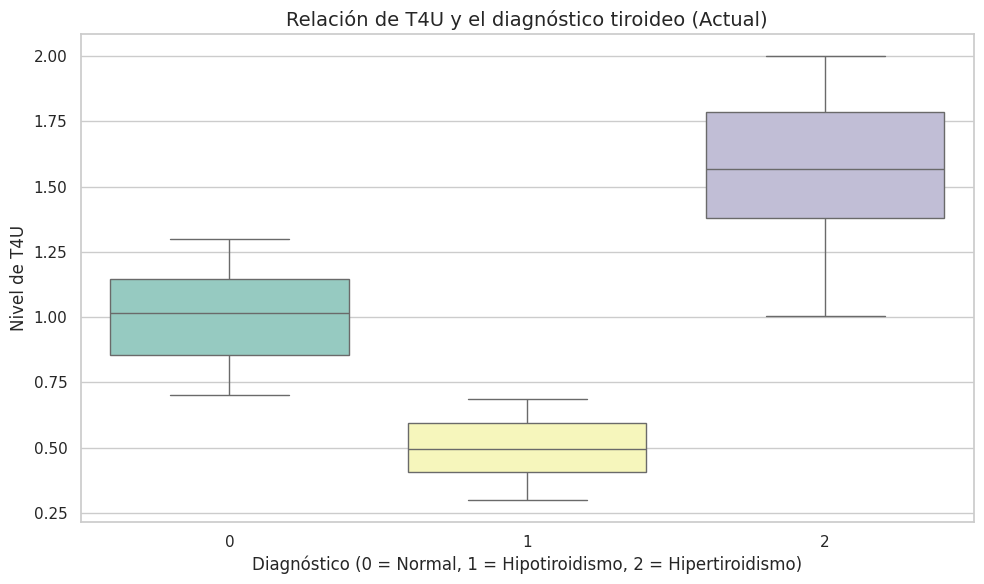

In [116]:
#Grafico de caja y bigotes para ver la relacion entre T4U y el diagnostico

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Crear gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Actual", y="T4U", data=df_final, palette="Set3")

# Etiquetas y título
plt.title("Relación de T4U y el diagnóstico tiroideo (Actual)", fontsize=14)
plt.xlabel("Diagnóstico (0 = Normal, 1 = Hipotiroidismo, 2 = Hipertiroidismo)")
plt.ylabel("Nivel de T4U")

# Mostrar gráfico
plt.tight_layout()
plt.show()

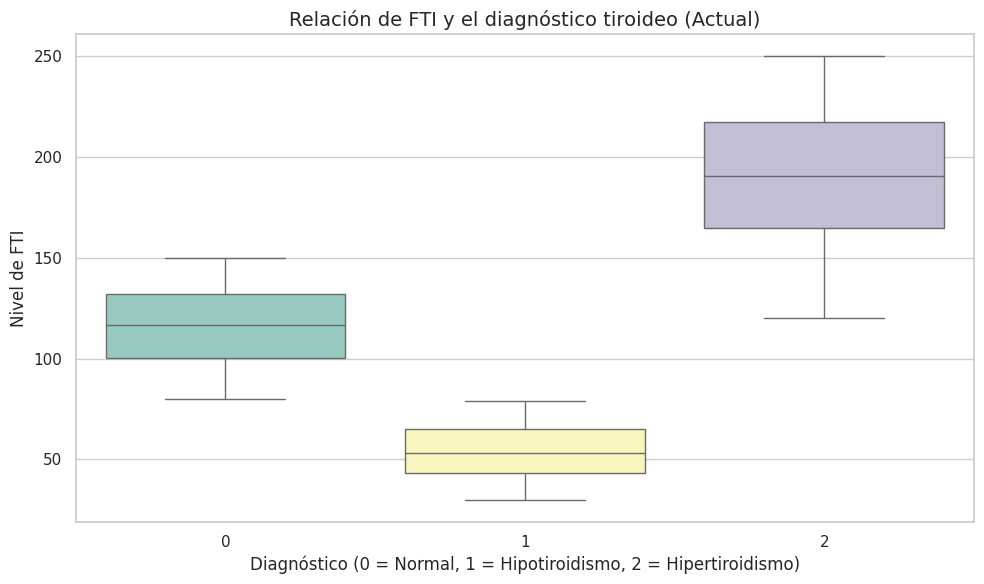

In [117]:
#Grafico de caja y bigotes para ver la relacion entre FTI y el diagnostico

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Crear gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Actual", y="FTI", data=df_final, palette="Set3")

# Etiquetas y título
plt.title("Relación de FTI y el diagnóstico tiroideo (Actual)", fontsize=14)
plt.xlabel("Diagnóstico (0 = Normal, 1 = Hipotiroidismo, 2 = Hipertiroidismo)")
plt.ylabel("Nivel de FTI")

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [118]:
#Analisis de especificidad del TSH
from sklearn.metrics import confusion_matrix

# Definir casos reales negativos (según columna 'Actual')
# Asumo que 0 = sano, 1+ = enfermedad (ajusta según tu codificación)
negativos_reales = (df_final['Actual'] == 0)

# Predicción basada en TSH (negativo = TSH normal)
tsh_normal = (df['TSH'] >= 0.4) & (df['TSH'] <= 4.0)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(negativos_reales, tsh_normal).ravel()

# Cálculo de especificidad
especificidad = tn / (tn + fp)
print(f"Especificidad del TSH: {especificidad:.2%}")

# Visualización
print("\nMatriz de confusión:")
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")

Especificidad del TSH: 100.00%

Matriz de confusión:
Verdaderos negativos (TN): 1469
Falsos positivos (FP): 0


El TSH cuenta con un 100% de especificidad lo que lo hace una variable indispensable en el diagnostico de alguna enfermedad tiroidea.

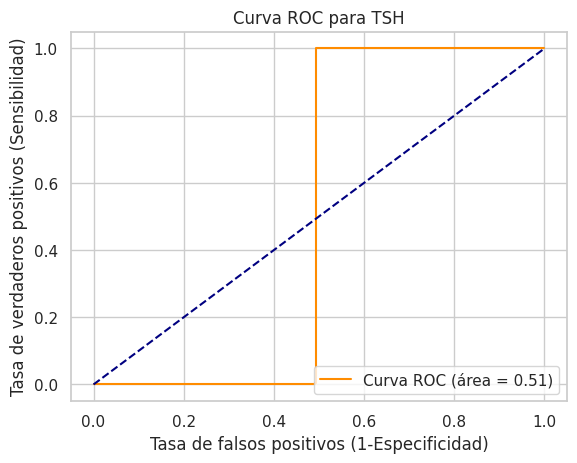

In [119]:
# Curva ROC para encontrar mejor punto de corte
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(negativos_reales, df_final['TSH'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de falsos positivos (1-Especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)')
plt.title('Curva ROC para TSH')
plt.legend(loc="lower right")
plt.show()

In [120]:
#Analisis de especificidad del T3
from sklearn.metrics import confusion_matrix

# Definir casos reales negativos (según columna 'Actual')
# Asumo que 0 = sano, 1+ = enfermedad (ajusta según tu codificación)
negativos_reales = (df_final['Actual'] == 0)

# Predicción basada en TSH (negativo = TSH normal)
tsh_normal = (df['T3'] >= 80) & (df['T3'] <= 200)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(negativos_reales, tsh_normal).ravel()

# Cálculo de especificidad
especificidad = tn / (tn + fp)
print(f"Especificidad del TSH: {especificidad:.2%}")

# Visualización
print("\nMatriz de confusión:")
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")

Especificidad del TSH: 90.67%

Matriz de confusión:
Verdaderos negativos (TN): 1332
Falsos positivos (FP): 137


In [121]:
#Analisis de especificidad del TT4
from sklearn.metrics import confusion_matrix

# Definir casos reales negativos (según columna 'Actual')
# Asumo que 0 = sano, 1+ = enfermedad (ajusta según tu codificación)
negativos_reales = (df_final['Actual'] == 0)

# Predicción basada en TT4 (negativo = TT4 normal)
tsh_normal = (df['TT4'] >=5.0) & (df['TT4'] <= 12.0)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(negativos_reales, tsh_normal).ravel()

# Cálculo de especificidad
especificidad = tn / (tn + fp)
print(f"Especificidad del TSH: {especificidad:.2%}")

# Visualización
print("\nMatriz de confusión:")
print(f"Verdaderos negativos (TN): {tn}")
print(f"Falsos positivos (FP): {fp}")

Especificidad del TSH: 97.48%

Matriz de confusión:
Verdaderos negativos (TN): 1432
Falsos positivos (FP): 37


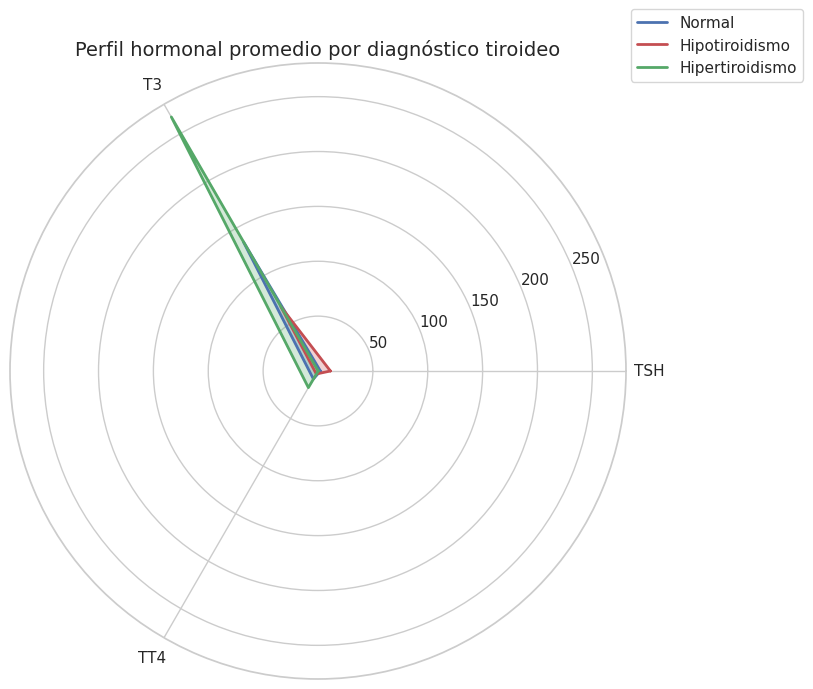

In [122]:
#Grafico de radar
# Seleccionar variables numéricas de interés
features = ['TSH', 'T3', 'TT4']
grouped = df_final.groupby('Actual')[features].mean()

# Etiquetas
labels = features
num_vars = len(labels)

# Ángulos para el radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Inicializar gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores y nombres
diagnosis_names = ['Normal', 'Hipotiroidismo', 'Hipertiroidismo']
colors = ['b', 'r', 'g']

# Dibujar cada grupo
for i, (idx, row) in enumerate(grouped.iterrows()):
    values = row.tolist()
    values += values[:1]  # Cerrar círculo
    ax.plot(angles, values, color=colors[i], linewidth=2, label=diagnosis_names[idx])
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Estética
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Perfil hormonal promedio por diagnóstico tiroideo", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


En el grafico de radar se representan los valores promedio de 3 hormonas relacionadas con la función tiroidea (TSH, T3, TT4) para tres grupos:

Normal (azul)
Hipotiroidismo (rojo)
Hipertiroidismo (verde)

*TSH (Thyroid-Stimulating Hormone):
Alto en hipotiroidismo (rojo). Esto es esperado: la glándula tiroides no produce suficiente hormona, por lo que el cuerpo aumenta la TSH para compensar.

Bajo en hipertiroidismo (verde). También esperado: hay demasiada hormona tiroidea circulante, entonces el cuerpo reduce la TSH.

*T3 y TT4 (hormonas tiroideas activas):
Elevadas en hipertiroidismo (verde). El cuerpo tiene exceso de hormonas tiroideas.

Disminuidas en hipotiroidismo (rojo). La tiroides no produce suficiente hormona.

**Hipotiroidismo**

In [123]:
## filtro de datos para hipotiroidismo
df_filtrado_hipo = df_final[df_final['Actual'] == 1]
df_filtrado_hipo

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
1,13,Female,10.016625,93.000000,3.116953,0.468052,43.000000,1,0,1,0,1,1,1,0,1,Family,1
2,17,Male,9.103430,91.000000,4.531221,0.468330,59.000000,1,1,1,1,0,0,1,0,0,Self,1
4,16,Female,8.683580,81.000000,2.819036,0.569156,49.000000,0,0,1,1,0,0,0,1,1,Self,1
8,17,Female,10.318026,96.000000,3.880930,0.424491,64.000000,1,1,0,1,1,0,0,1,1,Family,1
9,14,Male,5.020242,98.000000,4.635671,0.538584,44.000000,1,1,1,0,1,1,0,1,1,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,9,Male,6.933372,66.613608,2.369646,0.344195,37.372815,1,0,1,1,0,1,0,1,0,Doctor,1
2489,19,Male,4.269516,50.142790,1.539578,0.609594,75.652501,0,1,1,1,1,1,1,0,0,Self,1
2494,15,Male,11.156774,59.756296,1.999780,0.635232,73.628067,1,1,0,1,1,1,0,1,1,Self,1
2495,18,Female,15.352092,77.706923,3.103030,0.438809,65.046600,1,0,0,1,1,1,0,1,1,Doctor,1


In [124]:
## filtro de datos para sintomas de hipotiroidismo
df_sintomas_hipo = df_filtrado_hipo[['Sweating or heat intolerance','Fatigue','Weight Changes','Goiter','Headaches or Migraine','Dry Skin/Hair Loss','Nutritional Deficiency','Pituitary diseases','Stress']]
df_sintomas_hipo

,Sweating or heat intolerance,Fatigue,Weight Changes,Goiter,Headaches or Migraine,Dry Skin/Hair Loss,Nutritional Deficiency,Pituitary diseases,Stress
1,1,1,1,1,1,0,0,1,0
2,1,0,1,0,1,0,1,0,1
4,0,0,0,1,1,1,1,0,0
8,1,0,0,1,0,1,1,1,1
9,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
2486,1,1,0,0,1,1,1,0,0
2489,0,1,1,0,1,0,1,1,1
2494,1,1,0,1,0,1,1,1,1
2495,1,1,0,1,0,1,1,1,0


In [125]:
df_filtrado_hipo_ = df_filtrado_hipo.rename(columns={'TSH': 'TSH_hipo'})
df_filtrado_hipo_

,Age,Sex,TSH_hipo,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
1,13,Female,10.016625,93.000000,3.116953,0.468052,43.000000,1,0,1,0,1,1,1,0,1,Family,1
2,17,Male,9.103430,91.000000,4.531221,0.468330,59.000000,1,1,1,1,0,0,1,0,0,Self,1
4,16,Female,8.683580,81.000000,2.819036,0.569156,49.000000,0,0,1,1,0,0,0,1,1,Self,1
8,17,Female,10.318026,96.000000,3.880930,0.424491,64.000000,1,1,0,1,1,0,0,1,1,Family,1
9,14,Male,5.020242,98.000000,4.635671,0.538584,44.000000,1,1,1,0,1,1,0,1,1,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,9,Male,6.933372,66.613608,2.369646,0.344195,37.372815,1,0,1,1,0,1,0,1,0,Doctor,1
2489,19,Male,4.269516,50.142790,1.539578,0.609594,75.652501,0,1,1,1,1,1,1,0,0,Self,1
2494,15,Male,11.156774,59.756296,1.999780,0.635232,73.628067,1,1,0,1,1,1,0,1,1,Self,1
2495,18,Female,15.352092,77.706923,3.103030,0.438809,65.046600,1,0,0,1,1,1,0,1,1,Doctor,1


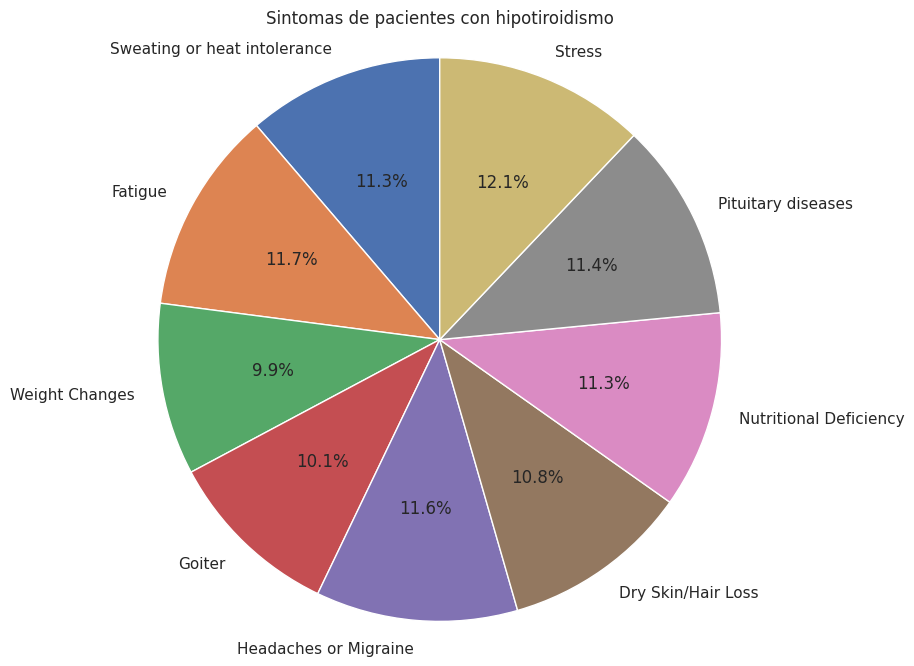

In [126]:
##cantidad de pacientes con cada uno de los sintomas
# Calculo de la suma de c/u de los sintomas para tener la cuenta de los pacientes con esos sintomas
cuenta_sintomas = df_sintomas_hipo.sum()

# Etiquetas para el grafico de torta
etiquetas = cuenta_sintomas.index

plt.figure(figsize=(8,8))
plt.pie(cuenta_sintomas, labels= etiquetas , autopct='%1.1f%%', startangle=90)
plt.title('Sintomas de pacientes con hipotiroidismo')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

En el gráfico se muestra los porcentajes de la cantidad de pacientes de la muestra que presentan cada uno de los sintomas. Se puede observar que no hay una diferencia significativa entre los diferentes síntomas, por lo que se podría decir que, en primer lugar sin ditinguir género, no hay síntomas que tengan mayor presencia que otros en el diagnostico de hipotiroidismo.

In [127]:
#medidas de resumen

promedio_TSH_hipo=df_filtrado_hipo.TSH.mean() #promedio o media
mediana_TSH_hipo=df_filtrado_hipo.TSH.median() #mediana o q2
moda_TSH_hipo=df_filtrado_hipo.TSH.mode() #mode

primer_cuartil=df_filtrado_hipo.TSH.quantile(0.25) #primer cuartil
tercer_cuartil=df_filtrado_hipo.TSH.quantile(0.75) #tercer cuartil
percentil_99=df_filtrado_hipo.TSH.quantile(0.99) #percentil 99

#imprimir los resultados
print('Promedio TSH en pacientes con hipotiroidismo:',promedio_TSH_hipo)
print('Mediana TSH en pacientes con hipotiroidismo:',mediana_TSH_hipo)
print('Moda TSH en pacientes con hipotiroidismo:',moda_TSH_hipo)

#outlier superior
print('outlier superior: ', tercer_cuartil+1.5*(tercer_cuartil-primer_cuartil)) #IQR(rango intercuartil)= tercer cuartil- primer cuartil

#outlier inferior
print('outlier inferior: ', primer_cuartil-1.5*(tercer_cuartil-primer_cuartil))

Promedio TSH en pacientes con hipotiroidismo: 11.319739233691207
Mediana TSH en pacientes con hipotiroidismo: 10.591430783268216
Moda TSH en pacientes con hipotiroidismo: 0       4.138482
1       4.141200
2       4.212058
3       4.244058
4       4.269516
         ...    
721    19.929395
722    19.930245
723    19.933189
724    19.960986
725    19.985473
Name: TSH, Length: 726, dtype: float64
outlier superior:  25.792589510106566
outlier inferior:  -3.255788841811734


En e estudio estadistico se considera que los valores por debajo del outlier inferior o por arriba del outlier superior son sospechosos. En este caso podemos decir que no hay valores outliers inferiores, porque no hay valores negativos de TSH. Tampoco hay outliers superiores porque no hay valores mayores a 25. (Abajo lo probamos)

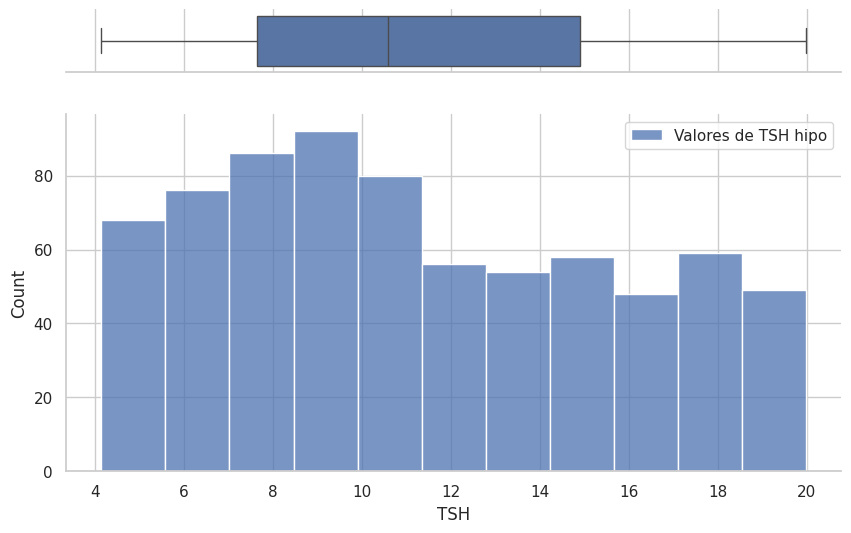

In [128]:
#IDENTIFICAR OUTLIERS EN TSH - hipo
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df_filtrado_hipo['TSH'], orient="h", ax=ax_box) #boxplot es un diagrama de cajas
sns.histplot(df_filtrado_hipo['TSH'], ax=ax_hist, label='Valores de TSH hipo')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

**Hipertiroidismo**

In [129]:
## filtros de datos para hipertiroidismo
df_filtrado_hiper = df_final[df_final['Actual'] == 2]
df_filtrado_hiper

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
3,14,Male,0.164024,243.000000,15.764255,1.031108,148.000000,0,0,1,1,0,0,0,1,1,Self,2
11,17,Male,0.044429,251.000000,14.586981,1.399196,123.000000,1,0,1,0,0,0,1,1,0,Doctor,2
21,10,Female,0.316011,273.000000,11.308884,1.182280,140.000000,0,1,1,1,0,1,1,1,1,Self,2
25,10,Female,0.131769,240.000000,15.843770,1.139568,136.000000,0,1,1,1,0,1,1,1,0,Family,2
28,16,Male,0.185958,232.000000,14.965237,1.061955,168.000000,1,0,1,1,1,0,1,0,0,Self,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,10,Male,0.065845,203.342599,19.304670,1.972465,156.016684,0,1,0,1,1,0,1,0,1,Family,2
2481,9,Female,0.189608,240.071700,24.439377,1.855290,179.432267,0,1,0,0,0,1,1,0,1,Self,2
2488,18,Male,0.041202,338.271407,12.507486,1.677792,219.279981,0,1,0,1,0,0,1,1,0,Family,2
2491,19,Male,0.296117,217.084769,13.129545,1.458178,208.262445,0,1,0,1,1,1,1,1,1,Family,2


In [130]:
df_filtrado_hiper_ = df_filtrado_hiper.rename(columns={'TSH': 'TSH_hiper'})
df_filtrado_hiper_

,Age,Sex,TSH_hiper,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
3,14,Male,0.164024,243.000000,15.764255,1.031108,148.000000,0,0,1,1,0,0,0,1,1,Self,2
11,17,Male,0.044429,251.000000,14.586981,1.399196,123.000000,1,0,1,0,0,0,1,1,0,Doctor,2
21,10,Female,0.316011,273.000000,11.308884,1.182280,140.000000,0,1,1,1,0,1,1,1,1,Self,2
25,10,Female,0.131769,240.000000,15.843770,1.139568,136.000000,0,1,1,1,0,1,1,1,0,Family,2
28,16,Male,0.185958,232.000000,14.965237,1.061955,168.000000,1,0,1,1,1,0,1,0,0,Self,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,10,Male,0.065845,203.342599,19.304670,1.972465,156.016684,0,1,0,1,1,0,1,0,1,Family,2
2481,9,Female,0.189608,240.071700,24.439377,1.855290,179.432267,0,1,0,0,0,1,1,0,1,Self,2
2488,18,Male,0.041202,338.271407,12.507486,1.677792,219.279981,0,1,0,1,0,0,1,1,0,Family,2
2491,19,Male,0.296117,217.084769,13.129545,1.458178,208.262445,0,1,0,1,1,1,1,1,1,Family,2


In [131]:
## filtro de datos para sintomas de hipertiroidismo
df_sintomas_hiper = df_filtrado_hiper[['Sweating or heat intolerance','Fatigue','Weight Changes','Goiter','Headaches or Migraine','Dry Skin/Hair Loss','Nutritional Deficiency','Pituitary diseases','Stress']]
df_sintomas_hiper

,Sweating or heat intolerance,Fatigue,Weight Changes,Goiter,Headaches or Migraine,Dry Skin/Hair Loss,Nutritional Deficiency,Pituitary diseases,Stress
3,0,0,0,1,1,1,1,0,0
11,1,0,1,0,1,1,0,0,0
21,0,1,1,1,1,1,1,0,1
25,0,1,1,0,1,1,1,0,1
28,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
2475,0,0,1,1,0,0,1,1,1
2481,0,1,1,1,0,0,0,0,1
2488,0,0,1,0,0,1,1,0,1
2491,0,1,1,1,0,1,1,1,1


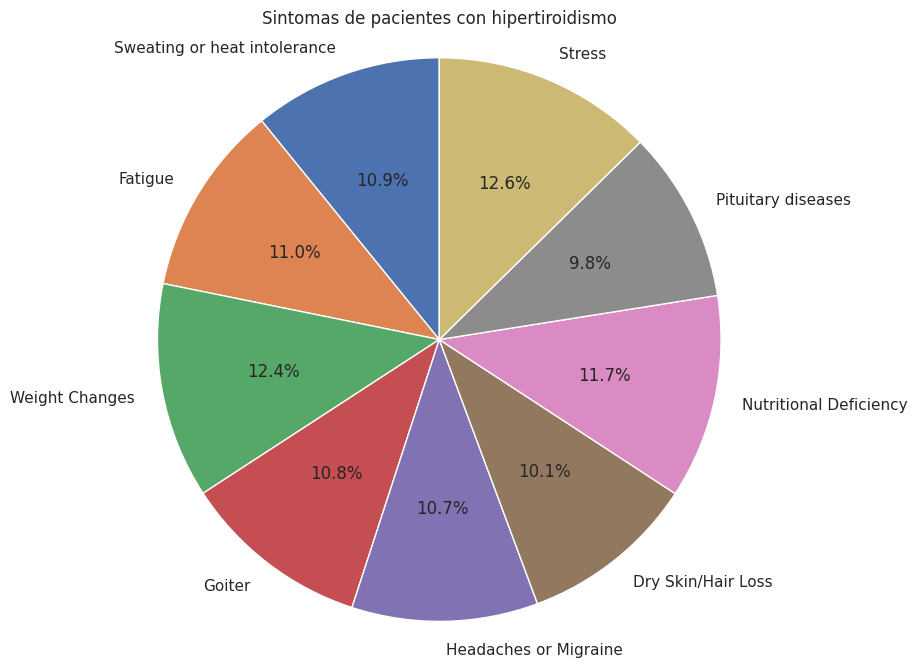

In [132]:
##cantidad de pacientes con cada uno de los sintomas
# Calculo de la suma de c/u de los sintomas para tener la cuenta de los pacientes con esos sintomas
cuenta_sintomas2 = df_sintomas_hiper.sum()

# Etiquetas para el grafico de torta
etiquetas = cuenta_sintomas2.index

plt.figure(figsize=(8,8))
plt.pie(cuenta_sintomas2, labels= etiquetas , autopct='%1.1f%%', startangle=90)
plt.title('Sintomas de pacientes con hipertiroidismo')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

En el gráfico se muestra los porcentajes de la cantidad de pacientes de la muestra que presentan cada uno de los sintomas. Se puede observar que no hay una diferencia significativa entre los diferentes síntomas, por lo que se podría decir que, en primer lugar sin ditinguir género, no hay síntomas que tengan mayor presencia que otros en el diagnostico de hipertiroidismo.

In [133]:
#medidas de resumen

promedio_TSH_hiper=df_filtrado_hiper.TSH.mean() #promedio o media
mediana_TSH_hiper=df_filtrado_hiper.TSH.median() #mediana o q2
moda_TSH_hiper=df_filtrado_hiper.TSH.mode() #mode

primer_cuartil=df_filtrado_hiper.TSH.quantile(0.25) #primer cuartil
tercer_cuartil=df_filtrado_hiper.TSH.quantile(0.75) #tercer cuartil
percentil_99=df_filtrado_hiper.TSH.quantile(0.99) #percentil 99

#imprimir los resultados
print('Promedio TSH en pacientes con hipotiroidismo:',promedio_TSH_hiper)
print('Mediana TSH en pacientes con hipotiroidismo:',mediana_TSH_hiper)
print('Moda TSH en pacientes con hipotiroidismo:',moda_TSH_hiper)

#outlier superior
print('outlier superior: ', tercer_cuartil+1.5*(tercer_cuartil-primer_cuartil)) #IQR(rango intercuartil)= tercer cuartil- primer cuartil

#outlier inferior
print('outlier inferior: ', primer_cuartil-1.5*(tercer_cuartil-primer_cuartil))

Promedio TSH en pacientes con hipotiroidismo: 0.1853526033208181
Mediana TSH en pacientes con hipotiroidismo: 0.1682432609426383
Moda TSH en pacientes con hipotiroidismo: 0      0.010181
1      0.010198
2      0.011823
3      0.012295
4      0.013692
         ...   
738    0.388466
739    0.388911
740    0.389367
741    0.389376
742    0.389820
Name: TSH, Length: 743, dtype: float64
outlier superior:  0.5674993913649125
outlier inferior:  -0.19230761629899423


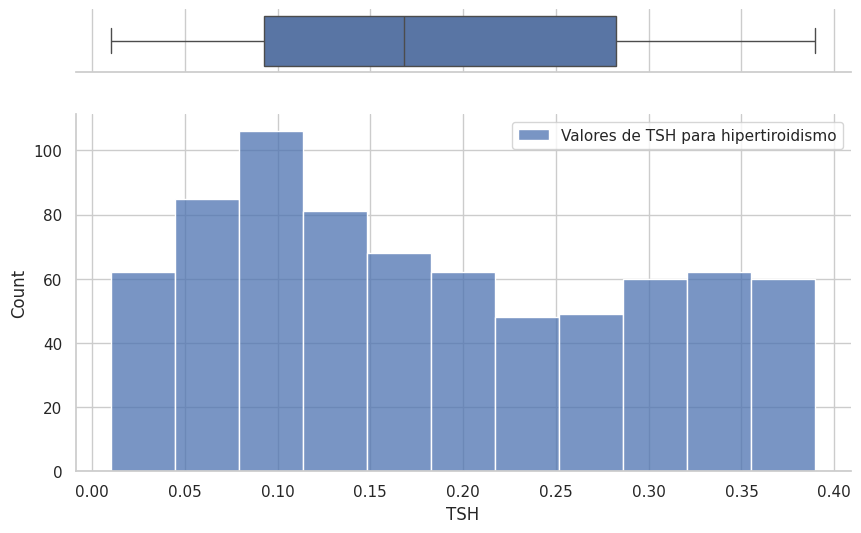

In [134]:
#IDENTIFICAR OUTLIERS EN TSH - hiper
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df_filtrado_hiper['TSH'], orient="h", ax=ax_box) #boxplot es un diagrama de cajas
sns.histplot(df_filtrado_hiper['TSH'], ax=ax_hist, label='Valores de TSH para hipertiroidismo')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

**Alteracion hormonal hipo e hiper**

In [135]:
##filtros para hipo e hiper
df_hiper_hipo = df_final[(df_final['Actual'] == 1) | (df_final['Actual'] == 2)]
df_hiper_hipo

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
1,13,Female,10.016625,93.000000,3.116953,0.468052,43.000000,1,0,1,0,1,1,1,0,1,Family,1
2,17,Male,9.103430,91.000000,4.531221,0.468330,59.000000,1,1,1,1,0,0,1,0,0,Self,1
3,14,Male,0.164024,243.000000,15.764255,1.031108,148.000000,0,0,1,1,0,0,0,1,1,Self,2
4,16,Female,8.683580,81.000000,2.819036,0.569156,49.000000,0,0,1,1,0,0,0,1,1,Self,1
8,17,Female,10.318026,96.000000,3.880930,0.424491,64.000000,1,1,0,1,1,0,0,1,1,Family,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,19,Male,0.296117,217.084769,13.129545,1.458178,208.262445,0,1,0,1,1,1,1,1,1,Family,2
2493,13,Male,0.038214,245.969560,16.690876,1.823949,240.561757,1,1,1,1,0,0,1,1,1,Family,2
2494,15,Male,11.156774,59.756296,1.999780,0.635232,73.628067,1,1,0,1,1,1,0,1,1,Self,1
2495,18,Female,15.352092,77.706923,3.103030,0.438809,65.046600,1,0,0,1,1,1,0,1,1,Doctor,1


In [136]:
##filtrar para alteracion hormonal
df_alteracion_hormonal = df_hiper_hipo[(df_hiper_hipo['TSH']<0.4) |(df_hiper_hipo['TSH']>4.0) |(df_hiper_hipo['T3']<80) |(df_hiper_hipo['T3']>200) | (df_hiper_hipo['TT4']<5.0) |(df_hiper_hipo['TT4']>12.0)]
df_alteracion_hormonal

,Age,Sex,TSH,T3,TT4,T4U,FTI,Sweating or heat intolerance,Stress,Headaches or Migraine,Nutritional Deficiency,Pituitary diseases,Fatigue,Weight Changes,Dry Skin/Hair Loss,Goiter,Referral source,Actual
1,13,Female,10.016625,93.000000,3.116953,0.468052,43.000000,1,0,1,0,1,1,1,0,1,Family,1
2,17,Male,9.103430,91.000000,4.531221,0.468330,59.000000,1,1,1,1,0,0,1,0,0,Self,1
3,14,Male,0.164024,243.000000,15.764255,1.031108,148.000000,0,0,1,1,0,0,0,1,1,Self,2
4,16,Female,8.683580,81.000000,2.819036,0.569156,49.000000,0,0,1,1,0,0,0,1,1,Self,1
8,17,Female,10.318026,96.000000,3.880930,0.424491,64.000000,1,1,0,1,1,0,0,1,1,Family,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,19,Male,0.296117,217.084769,13.129545,1.458178,208.262445,0,1,0,1,1,1,1,1,1,Family,2
2493,13,Male,0.038214,245.969560,16.690876,1.823949,240.561757,1,1,1,1,0,0,1,1,1,Family,2
2494,15,Male,11.156774,59.756296,1.999780,0.635232,73.628067,1,1,0,1,1,1,0,1,1,Self,1
2495,18,Female,15.352092,77.706923,3.103030,0.438809,65.046600,1,0,0,1,1,1,0,1,1,Doctor,1


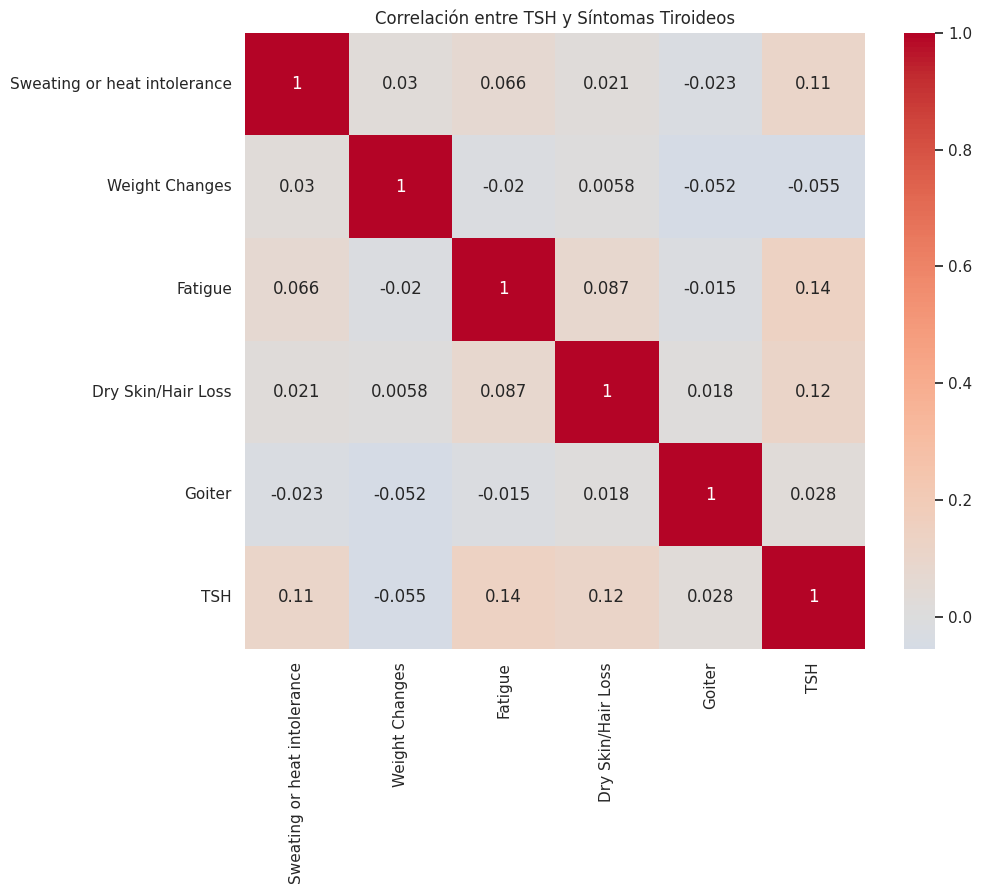

In [137]:
#Grafico de Heatman de Síntomas presentes en personas con alteracion hormonal vs TSH
# Seleccionar columnas de síntomas (ajusta según tu dataset)
sintomas = ['Sweating or heat intolerance', 'Weight Changes', 'Fatigue',
            'Dry Skin/Hair Loss', 'Goiter']  # Ejemplo

# Calcular correlación con TSH
corr_matrix = df_hiper_hipo[sintomas + ['TSH']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación entre TSH y Síntomas Tiroideos")
plt.show()

La mayoría de las correlaciones son débiles, lo que indica que esta clasificacion de sintomas no predice bien los niveles de TSH. Esto se puede deber a la mala clasificacion de sintomas en el dataset, ya que por ejemplo cuando habla de intolerancia al frio o al calor no es esfecifico, tampoco con cambios en el peso (aumento o disminución).

In [138]:
# Calculo de la suma de c/u de los sintomas para tener la cuenta de los pacientes con esos sintomas
cuenta_sintomas3 = df_alteracion_hormonal[['Sweating or heat intolerance','Fatigue','Weight Changes','Goiter','Headaches or Migraine','Dry Skin/Hair Loss','Nutritional Deficiency','Pituitary diseases','Stress']].sum()
cuenta_sintomas3

,0
Sweating or heat intolerance,934
Fatigue,956
Weight Changes,931
Goiter,879
Headaches or Migraine,941
Dry Skin/Hair Loss,882
Nutritional Deficiency,970
Pituitary diseases,899
Stress,1042


**MODELO DE MASHING LEARNING - ÁRBOL DE DECISIÓN**

In [139]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [140]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz  # Importa el módulo graphviz

# 3. Crear y entrenar el árbol
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Seleccionar características específicas y variable objetivo
X = df[['TSH', 'TT4', 'T3']]
y = df['Actual']


clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [141]:
y.unique()

array([0, 1, 2])

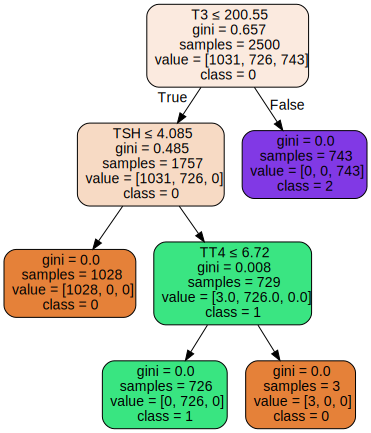

In [142]:
# 4. Exportar a Graphviz
dot_data = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names=X.columns.tolist(),  # Convertir a lista
                               class_names=[str(x) for x in y.unique()],  # Asegurar strings
                               filled=True,
                               rounded=True,
                               special_characters=True)

# 5. Generar y mostrar el gráfico
graph = graphviz.Source(dot_data)
graph.render("arbol_decision_tiroides", format='png', cleanup=True)  # Guardar como imagen
graph  # Mostrar en notebook